In [12]:
try:
    import joblib
except ImportError:
    from sklearn.externals import joblib

import os
import json
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from clearml import Task, TaskTypes, Model, OutputModel, Dataset

In [14]:
dataset = Dataset.create(dataset_name="Titanic dataset",
                         dataset_project="Titanic test",
                         dataset_tags=["initial", "titanic", "train"],
                         dataset_version="1.0.0",
                         description="Initial titanic dataset for demo",
                         parent_datasets = None,
                         use_current_task=False,
                         output_uri=None)
dataset.add_files(path="./data/train.csv")
dataset.finalize(verbose=True, auto_upload=True)

ClearML results page: https://app.clear.ml/projects/6c28296ea86b42b0a9d9f6d62486a28d/experiments/f9a258eada0c458596cad533f2a1a51c/output/log
ClearML dataset page: https://app.clear.ml/datasets/simple/6c28296ea86b42b0a9d9f6d62486a28d/experiments/f9a258eada0c458596cad533f2a1a51c
Pending uploads, starting dataset upload to https://files.clear.ml
Uploading dataset changes (1 files compressed to 21.57 KiB) to https://files.clear.ml
File compression and upload completed: total size 21.57 KiB, 1 chunk(s) stored (average size 21.57 KiB)
Updating statistics and genealogy


True

In [16]:
train = Task.init(project_name="pipeline/train_pipeline",
                  task_name="train task",
                  task_type=TaskTypes.training,
                  tags=["sklearn", "logistic", "titanic", "baseline"],
                  output_uri=True)

In [33]:
# train.connect_configuration(name="yaml conf", configuration="./data/config.yaml")
params = {"model" : "Logistic_Regression_base",
          "l1_ratio": 0.25,
          "penalty" : "elasticnet",
          "random_state" : 0,
          "solver":"saga"}
train.connect(mutable=params, name="Params")

{'model': 'Logistic_Regression_base',
 'l1_ratio': 0.1,
 'penalty': 'elasticnet',
 'random_state': 0,
 'solver': 'saga'}

## Training and saving model

In [34]:
p = train.get_parameters()
model = LogisticRegression(penalty = p['Params/penalty'], l1_ratio = float(p['Params/l1_ratio']), solver=p['Params/solver'], random_state = int(p['Params/random_state']))  # sklearn LogisticRegression class
model.fit(X_train, y_train)
result = model.score(X_test, y_test)

C:\Users\Antonin_Joly\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(l1_ratio=0.1, penalty='elasticnet', random_state=0,
                   solver='saga')

In [38]:
train.get_logger().report_single_value(name="Score", value=result)

ClearML Monitor: Reporting detected, reverting back to iteration based reporting


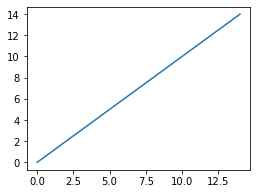

In [40]:
fig = plt.figure(1, figsize=(4, 3))
plt.plot(range(15),range(15))
plt.show()
train.get_logger().report_matplotlib_figure(title="Manual matplotlib report", series="Just a plot", iteration=0, figure=fig)

In [41]:
joblib.dump(model, 'model.pkl', compress=True)
train.update_output_model(model_path="./model.pkl",
                          tags=["scikit", "baseline", "from_task"],
                          name="model_from_task",
                          comment="this is the model manually saved using the task object.",
                          model_name="model_from_task",
                          auto_delete_file=False)

'https://files.clear.ml/pipeline/train_pipeline/train task.bd32f0ba12bc46dea7e0c82e109d08b2/models/model.pkl'

In [42]:
df = pd.read_csv("./data/train.csv")
train.get_logger().report_table(title='table example',
                               series='pandas DataFrame',
                               iteration=0,
                               table_plot=df)

In [43]:
train.close()